# Проектная работа

# Инструкция по выполнению проекта:

Вы - маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несколько прошлых месяцев ваш бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Вам нужно разобраться в причинах этой ситуации.

У вас в распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Вам предстоит изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.

# Описание данных
Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Таблица orders_log_short (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

Таблица costs_short (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

## Шаг 1. Загрузка данных и подготовка их к анализу

### Загрузка и первичный анализ данных

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline



In [2]:
visits = pd.read_csv('./visits_info_short.csv')
orders = pd.read_csv('./orders_info_short.csv')
costs = pd.read_csv('./costs_info_short.csv')


In [3]:
visits.info()
visits

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


In [4]:
orders.info()
orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


In [5]:
costs.info()
costs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


Исходя из первичного анализа, вижу, что во всех 3-х таблицах наблюдается неправильный тип данных для столбцов Session Start, Session End и прочих столбцов с указанием даты. 
Также я бы перевела все столбцы в единый регистр.

### Предобработка данных

In [6]:
visits.columns

Index(['User Id', 'Region', 'Device', 'Channel', 'Session Start',
       'Session End'],
      dtype='object')

In [7]:
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns.values]
visits.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

In [8]:
orders.columns

Index(['User Id', 'Event Dt', 'Revenue'], dtype='object')

In [9]:
orders = orders.rename(columns={'User Id':'user_id','Event Dt':'event_dt','Revenue':'revenue'})
orders.columns

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

In [10]:
costs.columns

Index(['dt', 'Channel', 'costs'], dtype='object')

In [11]:
costs.columns = costs.columns.str.lower()
costs.columns

Index(['dt', 'channel', 'costs'], dtype='object')

Привела все столбцы к единому регистру для более удобной работы с данными.

In [12]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [13]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [14]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
costs.info()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Привела все указанные выше столбцы к нужному типу данных.

In [15]:
orders[orders.duplicated()]

,user_id,event_dt,revenue


In [16]:
visits[visits.duplicated()]

,user_id,region,device,channel,session_start,session_end


In [17]:
costs[costs.duplicated()]

,dt,channel,costs


В рамках данного пункта были проделаны следующие действия:
- Загружены данные из исходных таблиц.
- Данные проверены на наличие пустых значений и дубликатов.
- Названия колонок всех таблиц приведены к "змеиному" регистру.
- Преобразованы типы столбцов, связанные с датами.

## Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

In [18]:
# функция для расчёта удержания

def get_retention(profiles, visits, observation_date, horizon_days, dimensions = [], ignore_horizon = False):
    
    # решаем какие столбцы оставим для группировки удержания, столбец признака платящего пользователя остается всегда
    dimensions = ['payer'] + dimensions
    
    # оттсекаем всех пользователей, которые не могли "дожить" до нужного горизонта 
    # (присоединились позже чем observation_date - horizon)
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # формируем массив сырых данных
    result_raw = result_raw.merge(visits[['user_id', 'session_start']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days
    
    # функция группировки по нужному набору измерений
    def group_by_dimensions(df, dims, horizon_days):     
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique')     # строим "треугольную таблицу" 
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'}) # определяем размеры когорт
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)                                   # присоединяем размеры когорт к треугольной таблице
        result = result.div(result['cohort_size'], axis = 0)                                                     # делим каждый из столбцов на размер когорты - расчитываем % удержания (retention rate)
        result = result[['cohort_size'] + list(range(horizon_days))]                                             # оставляем только наблюдения до нужного горизонта и столбец размеров когорт
        result['cohort_size'] = cohort_sizes                                                                     # пересприсваиваем столбец размеров когорт, ведь во время деления он превратился в 1
        return result
    
    # расчитываем удержание 
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # рассчитываем удержание по всем параметрам + дата
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    # возвращаем и таблицы удержания и сырые данные (чтобы в случае чего можно было в них покопаться при отладке)
    return result_raw, result_grouped, result_in_time

In [19]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [20]:
def get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

## Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

In [21]:
def get_profiles(visits, orders, costs):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles

In [22]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [23]:
profiles['first_ts'].min()

Timestamp('2019-05-01 00:00:41')

In [24]:
profiles['first_ts'].max()

Timestamp('2019-10-27 23:59:04')

### Вопрос 1: Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?

In [25]:
df_country = pd.DataFrame()
df_country['users_total'] = profiles.groupby('region')['user_id'].count().sort_values(ascending=False) 
df_country['users_part'] = profiles.groupby('region')['user_id'].count().sort_values(ascending=False) / profiles['user_id'].count()

df_country['users_pay'] = profiles[profiles['payer']].groupby('region')['user_id'].count().sort_values(ascending=False)
df_country['users_pay_part'] = profiles[profiles['payer']].groupby('region')['user_id'].count().sort_values(ascending=False)/ profiles.loc[profiles['payer'], 'user_id'].count()

df_country

,users_total,users_part,users_pay,users_pay_part
region,,,,
United States,100002,0.666644,6902,0.777165
UK,17575,0.117160,700,0.078820
France,17450,0.116327,663,0.074654
Germany,14981,0.099868,616,0.069362


Выяснила, что покупатели приходят из 4 стран: США, Великобритания, Франция и Германия, тогда как больше всего платящих пользователей находится в США - 77% от общего числа пользователей.

### Вопрос 2: Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?

In [26]:
df_country = pd.DataFrame()
df_country['users_total'] = profiles.groupby('device')['user_id'].count().sort_values(ascending=False) 
df_country['users_part'] = profiles.groupby('device')['user_id'].count().sort_values(ascending=False) / profiles['user_id'].count()

df_country['users_pay'] = profiles[profiles['payer']].groupby('device')['user_id'].count().sort_values(ascending=False)
df_country['users_pay_part'] = profiles[profiles['payer']].groupby('device')['user_id'].count().sort_values(ascending=False)/ profiles.loc[profiles['payer'], 'user_id'].count()

df_country

,users_total,users_part,users_pay,users_pay_part
device,,,,
iPhone,54479,0.363174,3382,0.380813
Android,35032,0.233534,2050,0.230830
PC,30455,0.203023,1537,0.173066
Mac,30042,0.200269,1912,0.215291


Выяснила, что покупатели пользуются 4 устройствами: iPhone, Android, PC и Mac, а платящих пользователи больше всего используют iPhone - 38%.

### Вопрос 3: По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

In [27]:
df_country = pd.DataFrame()
df_country['users_total'] = profiles.groupby('channel')['user_id'].count().sort_values(ascending=False) 
df_country['users_part'] = profiles.groupby('channel')['user_id'].count().sort_values(ascending=False) / profiles['user_id'].count()

df_country['users_pay'] = profiles[profiles['payer']].groupby('channel')['user_id'].count().sort_values(ascending=False)
df_country['users_pay_part'] = profiles[profiles['payer']].groupby('channel')['user_id'].count().sort_values(ascending=False)/ profiles.loc[profiles['payer'], 'user_id'].count()

df_country

,users_total,users_part,users_pay,users_pay_part
channel,,,,
organic,56439,0.376240,1160,0.130616
FaceBoom,29144,0.194283,3557,0.400518
TipTop,19561,0.130400,1878,0.211463
OppleCreativeMedia,8605,0.057364,233,0.026236
LeapBob,8553,0.057017,262,0.029501
WahooNetBanner,8553,0.057017,453,0.051008
RocketSuperAds,4448,0.029652,352,0.039635
MediaTornado,4364,0.029092,156,0.017566
YRabbit,4312,0.028745,165,0.018579


Всего рекламных каналов 11, больше всего платящих пользователей выходит с FaceBoom - 40%. На втором месте идет TipTop - 20%.      

По результатам предварительного анализа данных можно сделать следующие выводы:
- Страной с наибольшей долей клиентов вообще и наибольшей долей платящих клиентов - является United States (66,7% и 77,7% соответственно). 
- Наиболее популярными девайсами является iPhone - 38% платящих пользователей. Прочие девайсы распределены более-менее одинаково.
- Наиболее популярным рекламным каналом для платящих пользователей являются TipTop и Faceboom. На них следует обратить внимание при дальнейшем анализе.

## Шаг 4. Маркетинг

Выясните:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

### Вопрос 1: Сколько денег потратили? Всего / на каждый источник / по времени

In [28]:
costs['costs'].sum()

105497.30000000002

<AxesSubplot:xlabel='channel'>

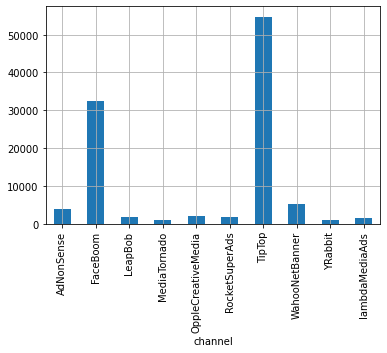

In [29]:
costs.groupby('channel')['costs'].sum().plot(kind='bar', grid=True)

<AxesSubplot:xlabel='dt'>

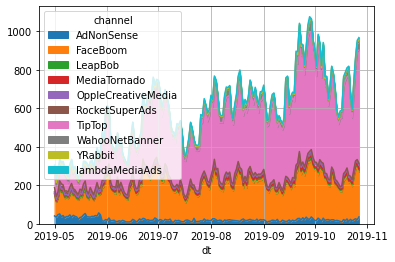

In [30]:
costs.pivot_table(index=['dt'], columns='channel', values = 'costs', aggfunc=np.sum).plot.area(grid=True)

В целом, затраты на маркетинг составили 105 497,3. Наибольшее вложение шло в такие источники, как TipTop и FaceBoom, вложения в прочие источники сравнительно небольшие (в сумме меньше, чем у FaceBoom).
Затраты равномерно росли в период с мая 2019 по ноябрь 2019, достигая некоторых пиков и снижаясь потом. При этом затраты росли в основном у канала TipTop. Затраты на прочие каналы практически не менялись с течением времени - FaceBoom вырос в начале, но потом прекратил рост.

### Вопрос 2: Сколько в среднем стоило привлечение одного покупателя из каждого источника?

In [31]:
ch_users = profiles.groupby('channel')['user_id'].count().reset_index()
ch_costs = costs.groupby('channel')['costs'].sum().reset_index()
ch_ad = ch_costs.merge(ch_users, on=['channel'], how='left',)
ch_ad['attract_cost'] = ch_ad['costs'] / ch_ad['user_id']
print(ch_ad)
print('\nСАС в целом по проекту ', ch_ad['costs'].sum() / ch_ad['user_id'].sum() )

              channel     costs  user_id  attract_cost
0          AdNonSense   3911.25     3880      1.008054
1            FaceBoom  32445.60    29144      1.113286
2             LeapBob   1797.60     8553      0.210172
3        MediaTornado    954.48     4364      0.218717
4  OppleCreativeMedia   2151.25     8605      0.250000
5      RocketSuperAds   1833.00     4448      0.412095
6              TipTop  54751.30    19561      2.799003
7      WahooNetBanner   5151.00     8553      0.602245
8             YRabbit    944.22     4312      0.218975
9      lambdaMediaAds   1557.60     2149      0.724802

САС в целом по проекту  1.127481323942759


Наиболее дорогими для привлечения оказались пользователи TipTop - 2,8, наиболее дешевыми LeapBob - 0,21, MediaTornado - 0,22 и YRabbit - 0,22. В среднем на привлечение одного пользователя тратится 1,13.

Анализ маркетинговых данных привел к следующим выводам:
- В целом, затраты на маркетинг составили 105 497,3. 
- Наибольшее вложение шло в такие источники, как TipTop и FaceBoom, вложения в прочие источники сравнительно небольшие (в сумме меньше, чем у FaceBoom).
- Затраты равномерно росли в период с мая 2019 по ноябрь 2019, достигая некоторых пиков и снижаясь потом. При этом затраты росли в основном у канала TipTop. Затраты на прочие каналы практически не менялись с течением времени - FaceBoom вырос в начале, но потом прекратил рост.
- Наиболее дорогими для привлечения оказались пользователи TipTop - 2,8, наиболее дешевыми LeapBob - 0,21, MediaTornado - 0,22 и YRabbit - 0,22. В среднем на привлечение одного пользователя тратится 1,13.

В дальнейшем анализе стоит уделить особое внимание каналу TipTop из-за растущих затрат.

## Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

In [32]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [33]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [34]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [35]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Проанализируйте общую окупаемость рекламы

In [36]:
profiles = profiles[profiles['channel'] != 'organic']

In [37]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

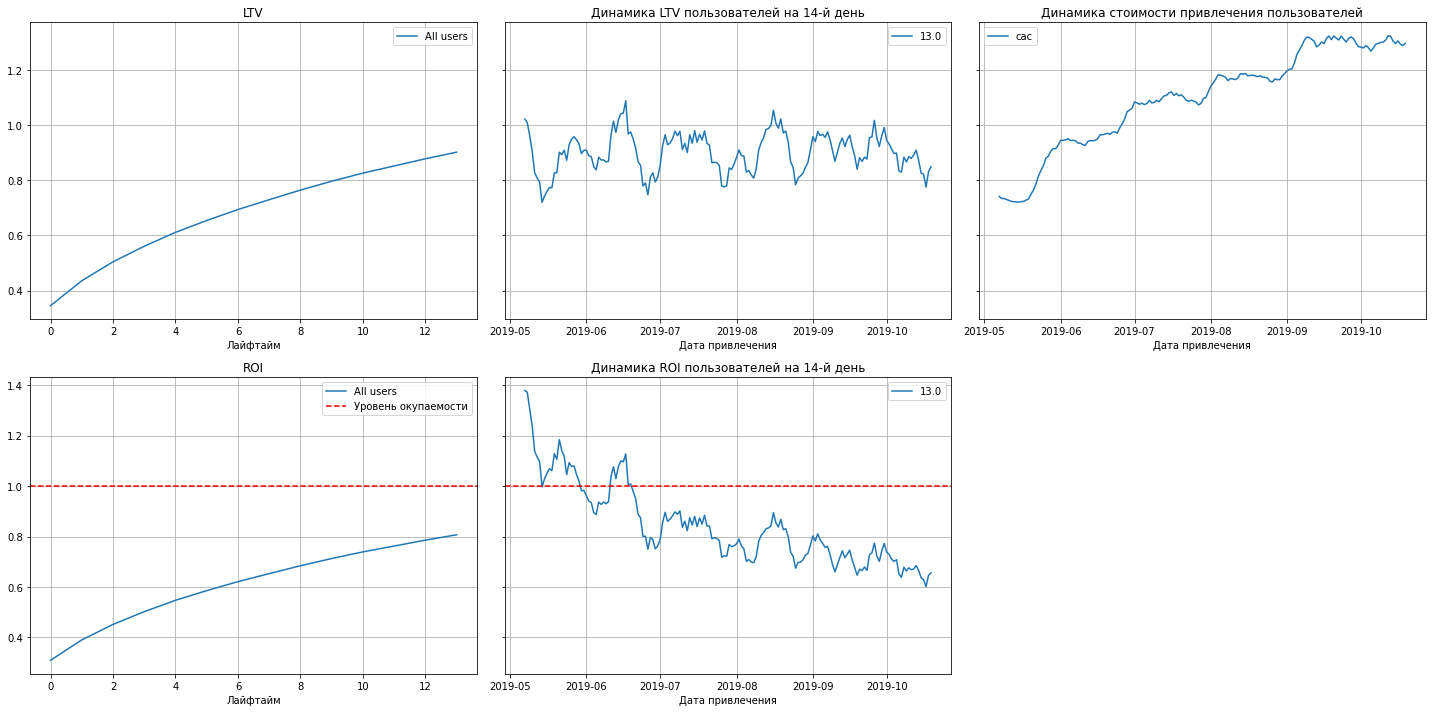

In [38]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По приведенным графикам можно сделать следующие выводы:
- Рекламые вложения не достигают уровня окупамости. 
- При этом рекламные вложения для привлечения новых пользователей растут (возрастающая кривая САС).
- Динамика LTV достаточно стабильна. Значит дело не в ухудшении качества и платежеспособности пользователей.
- При этом динамика ROI имеет убывающую тенденцию - окупаемость рекламы устойчиво снижается, вынуждая увеличивать затраты на нее.

На основе этого анализа можно сказать, что проводимая рекламная кампания неэффективна и вынуждает компанию тратить все больше и больше средств на ее поддержание. Рассмотрим данные в большей детализации.

### Проанализируйте окупаемость рекламы с разбивкой по странам

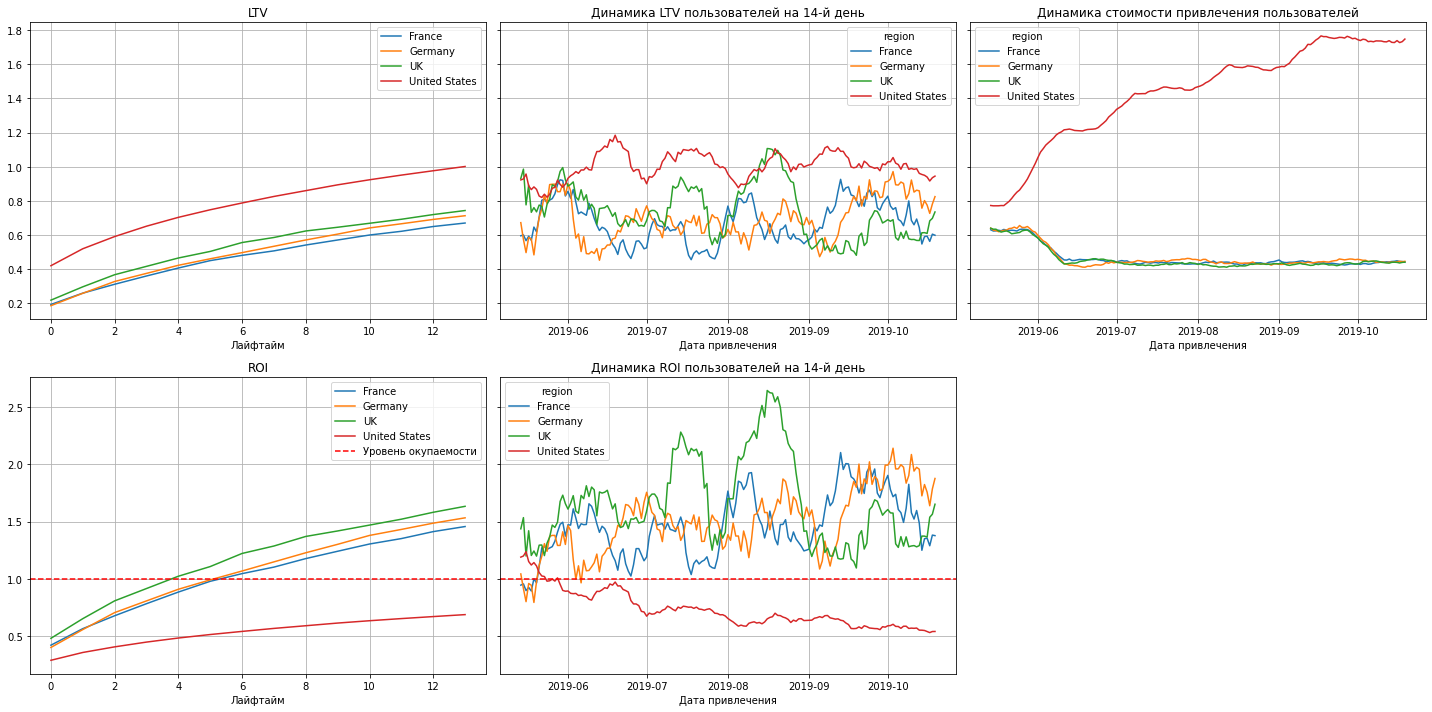

In [39]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

На данных графиках очевидная проблема - рекламные вложения в United States не окупаются, в отличии от остальных стран. Также можно заметить следующее:
- Несмотря на общую неокупаемость, клиенты использующие приложение в United States не теряют в качестве. Более того, LTV пользователей в United States устойчиво привышает LTV пользователей в других странах; 
- На общую динамику САС наибольшее влияние оказали именно данные из United States - там тратится больше всего средств на привлечение новых пользователей, при этом эти средства не окупаются.

Для более глубокого понимания посмотрим на конверсию и удержание пользователей по странам.

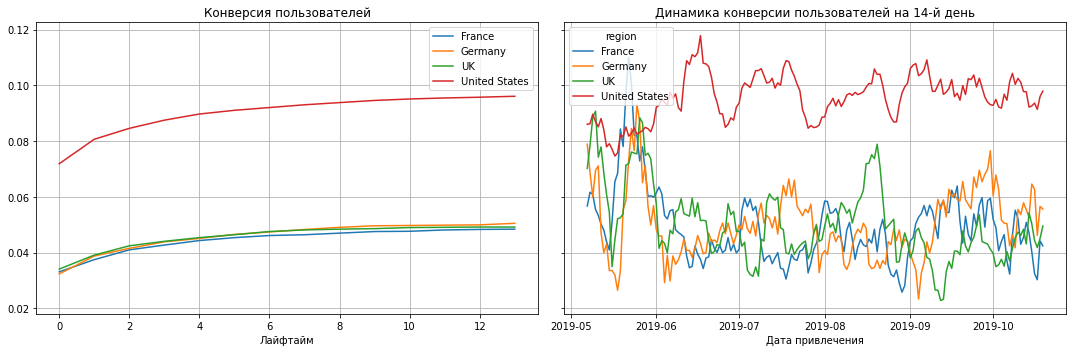

In [40]:
# смотрим конверсию с разбивкой по странам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

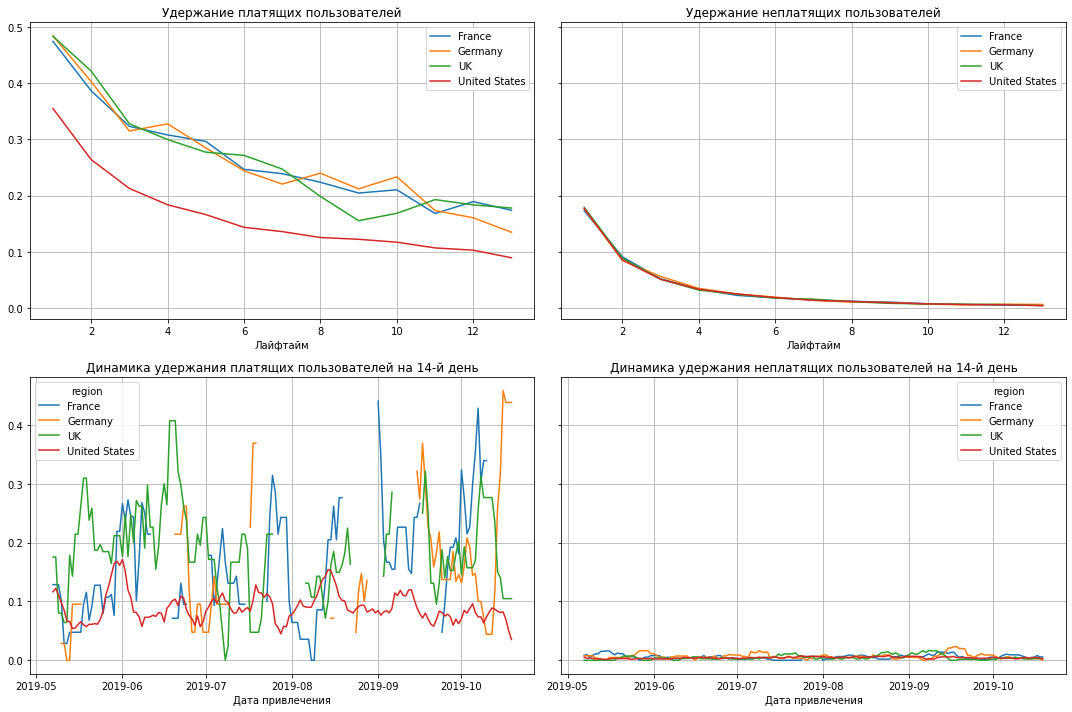

In [41]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Пользователи из United States имеют неплохую конверсию, но также сниженное удержание в сравнении с другими странами.

Столь сильные различия между United States и прочими странами позволяют нам уточнить наш анализ и попробовать понять, какой аспект данных для пользователей из Штатов оказывает негативное влияние на нашу рекламную компанию.

### Проанализируйте окупаемость рекламы с разбивкой по устройствам

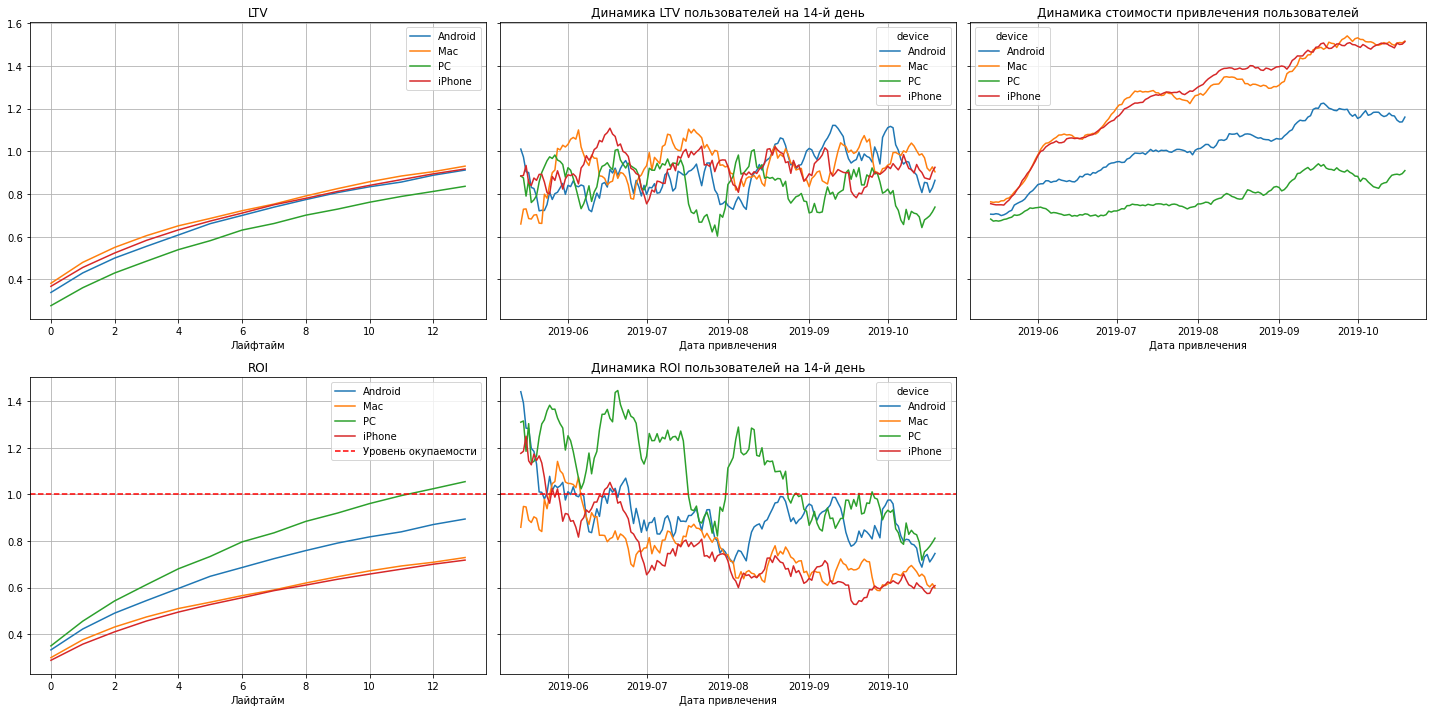

In [42]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Данные по девайсам имеют более-менее подобную структуру динамики показателей. Стоит отметить, что на всех платформах наблюдается отрицательная динамика ROI и рост рекламных вложений. Отдельно стоит отметить платформу iPhone и Mac, которые не достигают окупаемости и  имеют повышенные значния САС. 

Однако, рассмотрим  такие же данные, но только по United States.

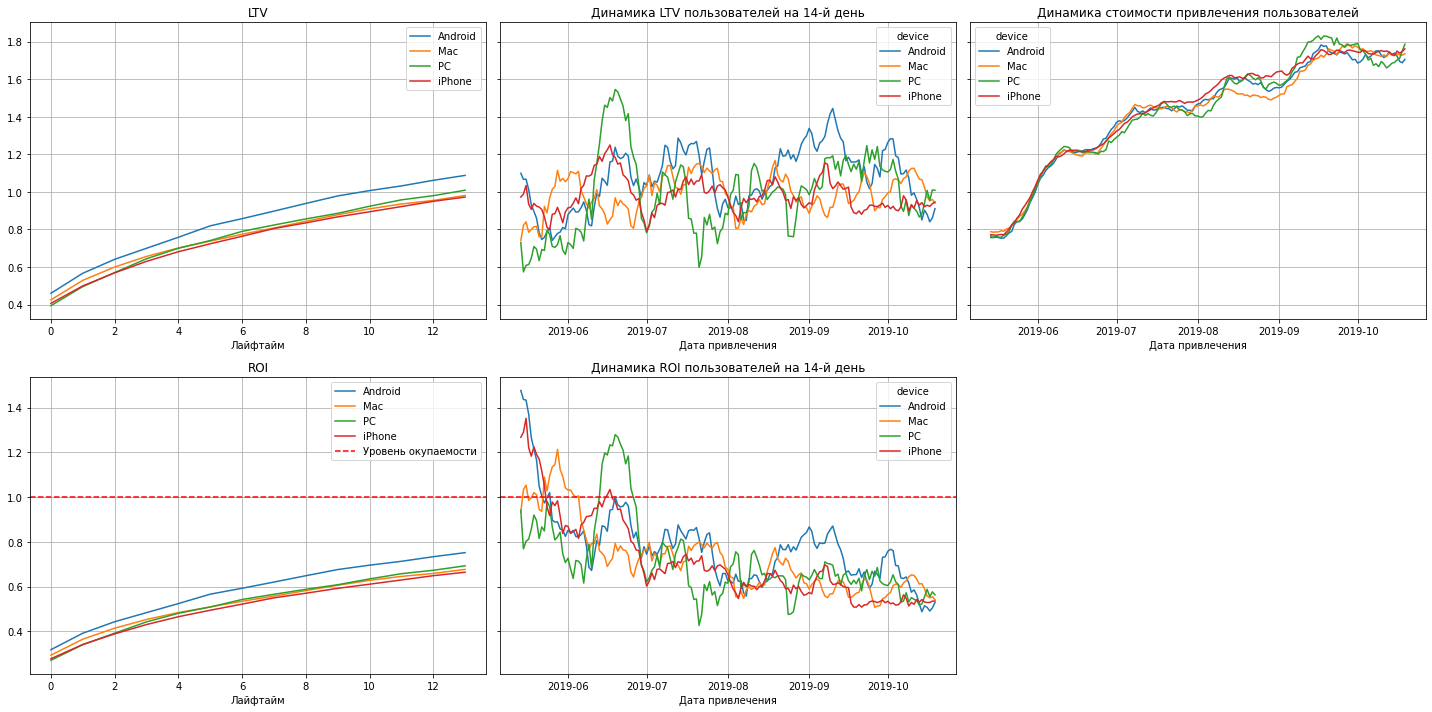

In [43]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles[profiles['region'].isin(['United States'])], orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 


In [44]:
profiles.groupby(['device', 'region'])['user_id'].count()

device   region       
Android  France            3313
         Germany           2849
         UK                3243
         United States    12436
Mac      France            1163
         Germany           1020
         UK                1086
         United States    15424
PC       France            4384
         Germany           3797
         UK                4551
         United States     6421
iPhone   France            2198
         Germany           1862
         UK                2274
         United States    27548
Name: user_id, dtype: int64

Cтруктура динамики показателей стала еще более подобной. Из графиков, а также из таблицы выше можно сделать вывод, что негативные показатели для платформ IPhone и Mac связаны с тем, что эти платформы в подавляющем большинстве присутствуют в United States в сравнении с другими странами, и сами по себе платформы практичеси не влияли на проблемы рекламной компании.

### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам

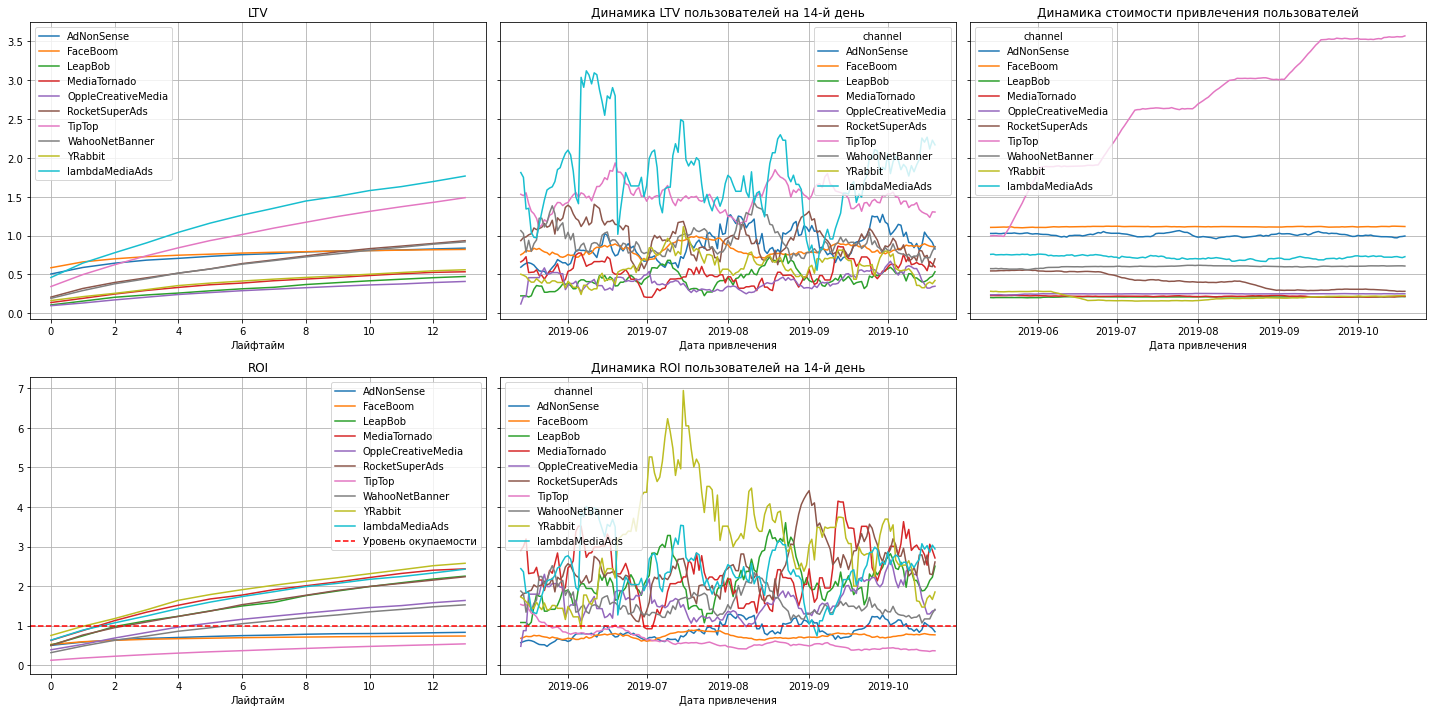

In [45]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Несмотря на запутанный график можно сделать некоторые предварительные выводы:
- Не окупается рекламная кампания на 3 платформах - AdNonSense, FaceBoom, TipTop.
- Динамика LTV на всех платформах достаточно стабильна.
- Стоимость привлечения резко растет только на платформе TipTop, на всех прочих она стабильна.
- Динамика ROI также более менее стабильна для всех платформ.

Таким образом, наиболее проблемной платформой выглядит платформа TipTop. Но для более точных выводов построим такие же графики, внутри только United States.

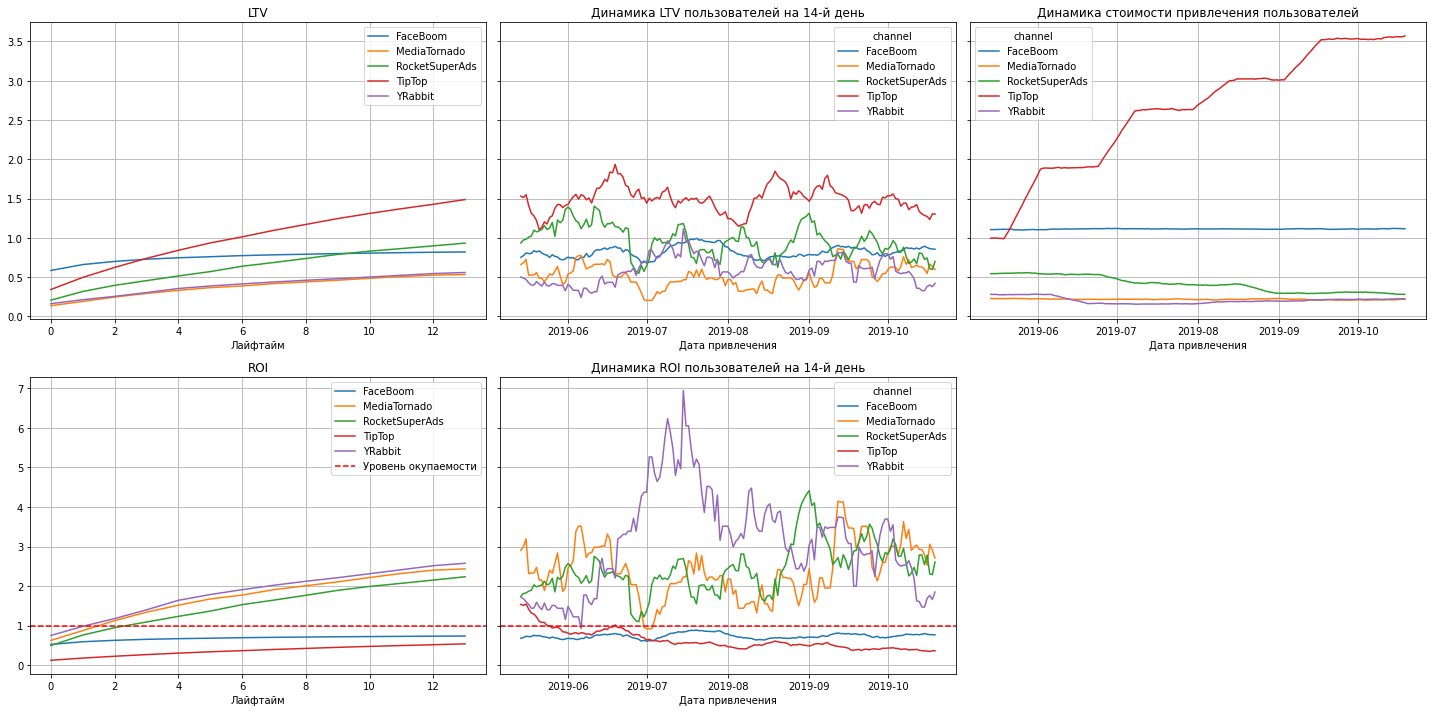

In [46]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles[profiles['region'].isin(['United States'])], orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

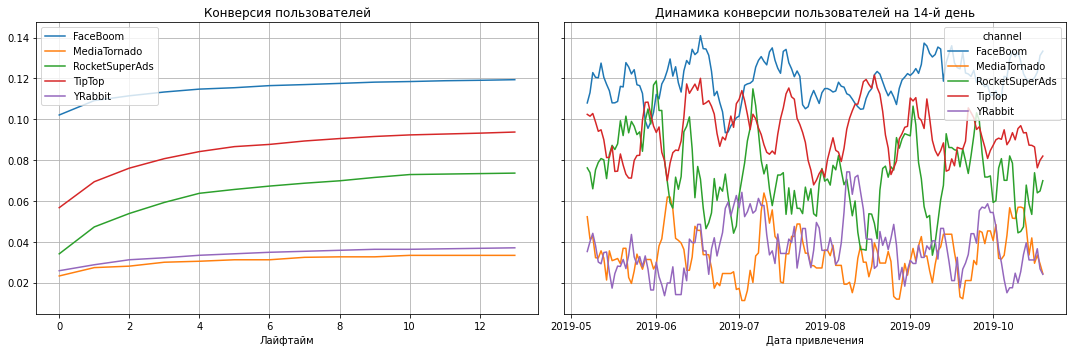

In [47]:
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles[profiles['region'].isin(['United States'])], orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

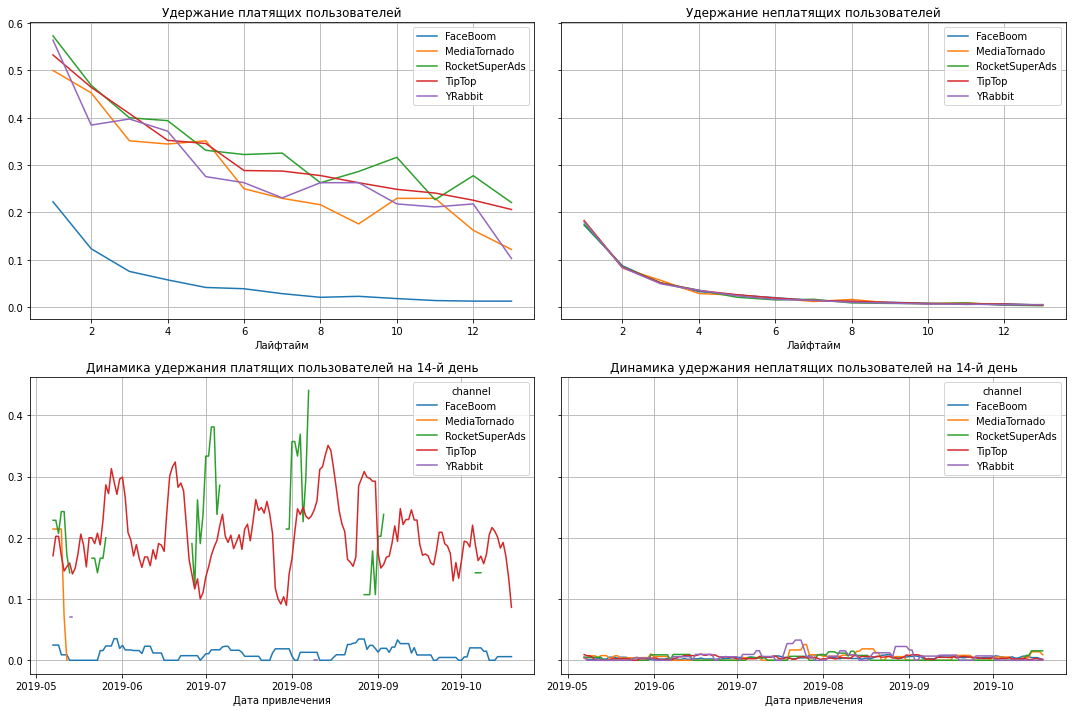

In [48]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles[profiles['region'].isin(['United States'])], visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Из данных графиков можно сделать вывод - наиболее проблемной платформой является TipTop. И так как из всей географии он присутствует только в United States (и имеет там большое значение), то реклама вкладываемая в TipTop и не окупаемая наносит ущерб всей рекламной компании.

Faceboom также является проблемной платформой с точки зрения окупаемости. Но это связано с тем, что FaceBoom, несмотря на высокую конверсию, практически не удерживает платящих пользователей.

## Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

При подготовке данных были проделаны следующие действия:
- Загружены данные из исходных таблиц.
- Данные проверены на наличие пустых значений и дубликатов.
- Названия колонок всех таблиц приведены к "змеиному" регистру.
- Преобразованы типы столбцов, связанные с датами.

По результатам предварительного анализа данных можно сделать следующие выводы:
- Страной с наибольшей долей клиентов вообще и наибольшей долей платящих клиентов - является United States (66,7% и 77,7% соответственно). 
- Наиболее популярными девайсами является iPhone - 38% платящих пользователей. Прочие девайсы распределены более-менее одинаково.
- Наиболее популярным рекламным каналом для платящих пользователей являются TipTop и Faceboom. На них следует обратить внимание при дальнейшем анализе.

Анализ маркетинговых данных привел к следующим выводам:
- В целом, затраты на маркетинг составили 105 497,3. 
- Наибольшее вложение шло в такие источники, как TipTop и FaceBoom, вложения в прочие источники сравнительно небольшие (в сумме меньше, чем у FaceBoom).
- Затраты равномерно росли в период с мая 2019 по ноябрь 2019, достигая некоторых пиков и снижаясь потом. При этом затраты росли в основном у канала TipTop. Затраты на прочие каналы практически не менялись с течением времени - FaceBoom вырос в начале, но потом прекратил рост.
- Наиболее дорогими для привлечения оказались пользователи TipTop - 2,8, наиболее дешевыми LeapBob - 0,21, MediaTornado - 0,22 и YRabbit - 0,22. В среднем на привлечение одного пользователя тратится 1,13.

На основании проведенного анализа показателей ROI, САС и LTV можно сделать следующие выводы:
- Основная проблема проведенной рекламной компании состоит в плохом маркетинге на платформе TipTop - вкладываемая реклама не окупается, а стоимость привлечения пользоватетей только растёт. А широкая распространенность этой платформы в United States приводит к проблемам компании на всем этом регионе. Предполагаю, что стоит изменить поход к маркетингу на данной платформе.

- Необходим дополнительный анализ кампании на платформе Faceboom. Обладая высокой конверсией и привлекая значительное количество платящих пользователей, платформа при этом практически не удерживает платящих клиентов, что значительно снижает окупаемость данной платформы.

Можно сформулировать следующие рекомендации для отдела маркетинга:
- Пересмотреть подход к рекламе на платформе TipTop - просто дополнительные вложения недостаточно эффективны.
- Пересмотреть подход к рекламе на платформе FaceBoom - определить причины пониженного удержания клиентов.
- Возможно увеличить вложения в меньшие рекламные канналы, которые при этом обладают высокой окупаемостью.